# Modèle Barre

## 1. Modélisation 

Il est compliqué voir impossible de réaliser un modèle analytique du déplacement d'un cable de caténaire. Il faudrait trouver une équation qui fasse intervenir une fonction $u(x,y,z,t)$ et pouvoir la résoudre.

On réalise une approximation de la forme du fil de contact dans un premier temps par une suite de barre.

![modelisation schema](Images/model.jpg "title")

### 1.1 Etude d'un élément fini

On approxime le déplacement d'un élément par la formule suivante : 

$$ u = N q $$

On utilise les valeurs au extremité de l'élément pour reconstituer le déplacement à l'intérieur de l'élément.

$$ q = \begin{pmatrix} u_1\\ u_2 \end{pmatrix} $$

On doit respecter les conditions limites suivantes sur l'élément : 

$$ \left\{
    \begin{array}\\
        u(0) \implies N_1(0) = 1 \quad \text{et} \quad  N_1(L) = 0 \\
        u(L) \implies N_2(0) = 0 \quad \text{et} \quad N_2(L) = 1 
    \end{array}
\right.
$$

On utilise les polynôme d'interpolation d'ordre 1 suivants :

$$ N_1(x) = 1 - \frac{x}{L} \quad N_2(x) = \frac{x}{L}$$

$$ N = \begin{pmatrix}
N_1 & N_2
\end{pmatrix} $$

On calcule la dérivée par rapport à $x$ :

$$ \frac{\partial N_1}{\partial x}(x) = - \frac{1}{L} \quad \frac{\partial N_2}{\partial x}(x) = \frac{1}{L}$$

On calcule l'énergie de déformation de la barre :

$$ V = \int_{0}^L \rho S \sigma^T \varepsilon dx = \frac{1}{2} u^T E S \int_0^L \frac{\partial N}{\partial x}^T\frac{\partial N}{\partial x} dx u = \frac{1}{2} u^T K u $$

$$ T = \frac{1}{2} \int_0^L \rho S \left( \frac{\partial u}{\partial x} \right)^2 dx = \frac{1}{2} \dot{u}^T \rho S \int_0^L N^TN dx \dot{u} = \frac{1}{2} \dot{u}^T M \dot{u} $$

Equation de Lagrange : 

$$ \frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{q}} \right) -  \frac{\partial \mathcal{L}}{\partial q} $$
avec $q$ la coordonnée généralisée. Ici les coordonnées généralisée sont $u_1$ et $u_2$

On peut calculer la matrice de raideur élémentaire : 
$$ K_{elem} = \frac{ES}{L} \begin{pmatrix}
1 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix} $$

La matrice de masse vaut : 
$$ M_{elem} = \frac{\rho S}{420 L} \begin{pmatrix}
140 & 0 & 70 & 0 \\
0 &  0 & 0 & 0 \\
70 & 0  & 140 & 0\\
0 &  0 & 0 & 0 
\end{pmatrix} $$

## 1.1 Changement de repère : 

On doit passer du repère local au repère global : 

$$ U = Ru $$

$$ \left\{
    \begin{array}\\
        U_x  = \cos(\theta) u_x + \sin(\theta) u_y  \\
        U_y  = -\sin(\theta) u_x + \cos(\theta) u_y
    \end{array}
\right.
$$

$$ R(\theta) = \begin{pmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{pmatrix} $$

$$ R(\theta) = \begin{pmatrix}
\cos(\theta) & \sin(\theta) & 0 & 0 \\
-\sin(\theta) & \cos(\theta) & 0 & 0 \\
0 & 0 & \cos(\theta) & \sin(\theta) \\
0 & 0 & -\sin(\theta) & \cos(\theta)
\end{pmatrix} $$

$$  M_{elem}u = f \implies RM_{elem}R^TU = F \implies  M_{global} = R(\theta) M_{elem} R(\theta)^T $$

Dans notre exemple, on considère un fil de contact avec 2 éléments :

Ensuite on doit changer de système de coordonnées, des coordonnées local à global : 

<span style="color:red"> **Calcul des matrices de passage à revoir !!!** </span>

$$ B_{element_1} = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}$$

$$ B_{element_2} = \begin{pmatrix}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}$$

$$ \begin{pmatrix}
u_{x1}  \\
u_{y1}  \\
u_{x2}  \\
u_{y2}  \\
u_{x3}  \\
u_{y3}  
\end{pmatrix}_G = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix} \begin{pmatrix}
u_{x1}  \\
u_{y1}  \\
u_{x2}  \\
u_{y2}  \\
\end{pmatrix}_E $$

$$ M_{global} = B^{-1} M_{elem} B $$

#### Etape x : l'assemblage
On commence par correctement dimensionner les matrices elementaire pour les assembler. 

Enfin, on vient assembler les matrices de raideurs : 

$$ K = \sum_i K_i $$

#### Etape y : On doit appliquer les conditions aux limites : 
On crée une matrice pour imposer les condtions limites. 

$$ K_{global,reduite} = BC^T  K_{global} BC $$

On fait de même pour les vecteurs des efforts : 
$$ F_{reduit} = BC^T F $$

On résoud finalement l'équation matricielle suivante : 

$$ F = KU $$

$$ U_{reduit} = K_{global,reduite}^{-1} F_{reduit} $$

#### Etape z : Prise en compte d'une charge répartie
On utilise le principe d'équivalance du travail discret et distribuer

## 2. Code

Nombre de noeuds : 3
Nombre de elements : 2


KeyboardInterrupt: Interrupted by user

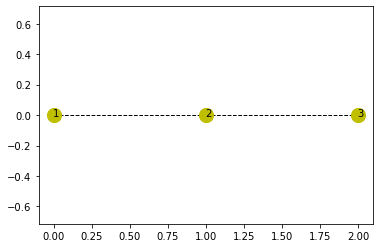

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

### Etape 1 : on defini notre geometrie
cas = 1
%run src\Cas_Test.ipynb
%run src\Fonctions.ipynb

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)

geom(NL)
F = apply_forces_poutre(NoN)
plot_forces( NL, F)

Matrice de raideur dans les coordonnees globales : 
 [[ 20000000.         0. -20000000.         0.]
 [        0.         0.         0.         0.]
 [-20000000.         0.  20000000.         0.]
 [        0.         0.         0.         0.]] 

 ### Debut de l'assemblage ###
### Fin de l'assemblage ###


Combien de ddl a bloquer ? 1
element concerne ? 1


BC 
 : [[0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]
K_glob 
 : [[ 40000000. -20000000.]
 [-20000000.  20000000.]]
F 
 : [[ -20.]
 [1990.]]
Deplacement : 
 [[9.85e-05]
 [1.98e-04]]
Deplacement : 
 [[0.00e+00]
 [0.00e+00]
 [9.85e-05]
 [0.00e+00]
 [1.98e-04]
 [0.00e+00]]
Reaction : 
 [[-1.96000000e+03]
 [ 1.66666667e+00]
 [ 4.54747351e-13]
 [ 0.00000000e+00]
 [-4.54747351e-13]
 [-1.66666667e+00]]
Calcul des contraintes (en MPa) : 
 [[  0. ]
 [ 19.7]
 [-19.7]]
[[0.00e+00]
 [9.85e-05]
 [1.98e-04]]


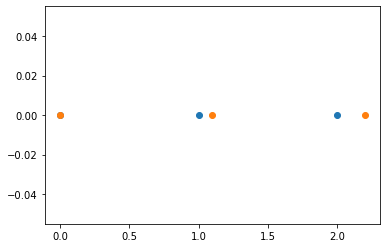

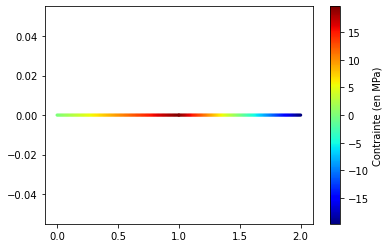

In [8]:
### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales

E = 200e9 # Module D'Young [en Pa]
S = 100e-6 # Section [en m^2]
L = 1 # Longueur d'un element [en m]
q = 20 # Charge repartie (en N/m)

K_elem = E*S/L*np.array([[1, 0 , -1, 0],
                         [0, 0 , 0, 0],
                        [-1, 0, 1, 0],
                        [0, 0 , 0 , 0]])

### Etape 3 : On passe la matrice de raideur dans les coordonnees globale (on fait des rotations)

K_rot = changement_base(R(0),K_elem)
print("Matrice de raideur dans les coordonnees globales : \n", K_rot, "\n")

### Etape 4 : On passe les coordonnees locales en coordonnees globales

B_1 = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1],
                [0,0,0,0],
                [0,0,0,0]])

B_2 = np.array([[0,0,0,0],
                [0,0,0,0],
                [1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

#matrices_de_passage = changement_coord(NL,EL)
#print("resultat changement de base : \n", B_1.dot(K_elem).dot(np.transpose(B_1)))

#K_glob = changement_base(B_1,K_rot)

### Etape 5 : Assemblage de la matrice globale 

matrices_de_passage = [B_1,B_2]
matrices_de_passage = changement_coord(NL,EL)

K_glob = assemblage(K_rot,matrices_de_passage,NL,EL)
#print(K_glob)

### Etape 6 : Application des conditions limites
#calcul_angle_element(NL,EL)
#lbc = apply_bc()

cas = 1
if cas == 1 : 
    BC = np.eye(NoN*2)
    BC = np.delete(BC,[0,1,3],1)
elif cas == 2 :
    BC = np.eye(NoN*2)
    BC = np.delete(BC,[0,1,3,5],1)
    
#print("BC \n :",BC)
BC = bc_barre(NoN)
#BC = create_bc_matrix_barre(NoN)
print("BC \n :",BC)

Q_equi = distributed_load(NoN,NoE,q)
    
F = np.array([[0],
             [0],
             [0],
             [0],
             [2000],
             [0]])

#F = apply_forces_barre(NoN)

K_glob_r = np.transpose(BC).dot(K_glob).dot(BC)
F_r = np.transpose(BC).dot(F+Q_equi)
print("K_glob \n :",K_glob_r)
print("F \n :",F_r)

### Etape 7 : Resolution

U_r = inv(K_glob_r).dot(F_r)
print("Deplacement : \n", U_r)
U = BC.dot(U_r)
print("Deplacement : \n", U)

### Etape 8 : Calcul force reaction

React = K_glob.dot(U) - F - Q_equi
print("Reaction : \n", React)

### Etape 9 : Calcul des contraintes
# On recalcule les déplacements locaux
u = R(0).dot(U[0:4])
f = K_elem.dot(u)

sigma = stress_barre(u)/1e6
print("Calcul des contraintes (en MPa) : \n",sigma)

### Etape 10 : Affichage

scale = 1000

plt.figure(1)
plt.scatter(NL[:,0],NL[:,1])
print(U[::2])
plt.scatter(NL[:,0]+scale*U[::2].flatten(),NL[:,1])

def plotting(NL,U) :
    x_scatter = []
    y_scatter = []
    color = []
    for i in range(len(NL)-1) :
        x_scatter.append(np.linspace(NL[i,0],NL[i+1,0],100))
        y_scatter.append(np.linspace(NL[i,1],NL[i+1,1],100))
        color.append(np.linspace(sigma[i],sigma[i+1],100))
    return x_scatter,y_scatter,color

x_scatter,y_scatter,color = plotting(NL,U)
#norm_x = Normalize(np.abs(color.min()),np.abs(color.max()))

plt.figure(2)
cmap = plt.get_cmap('jet')
plt.scatter(x_scatter,y_scatter,c = color,cmap = cmap,s=10, edgecolor = 'none' )
plt.colorbar(label='Contrainte (en MPa)') #ScalarMappable(norm = norm_x, cmap = cmap ))
plt.show()